# Supervised Learning - Classification Problem

Agenda :<br>
1. Conceptual Revision <br>
2. Dataset Description <br>
3. Data Preprocessing <br>
4. Data Modelling and Performance <br>

### Dataset
<br>
You are going to predict the Insurance claim using logistic regression.
This dataset contains information on the insurance claim. Each observation is a different policyholder with various features like the age of the person, the gender of the policyholder, body mass index, providing an understanding of the body, number of children of the policyholder, smoking state of the policyholder and individual medical costs billed by health insurance.

The dataset has details of 1338 Insurance claim with the following 8 features.

| Feature	|Description|<br>
| :- | -: | :-: |
|age	|age of policyholder|
|sex|male(1)/female(0)|
|bmi	|body mass index(kg /m^2)|
|children	|number of children/dependents of policyholder|
|smoker	|smoking state nonsmoker(0)/smoker(1)|
|region|	residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)|
|charges	|medical cost|
|insuranceclaim	|yes(1)/no(0)|

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [8]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

## EDA and Data Pre Processing 

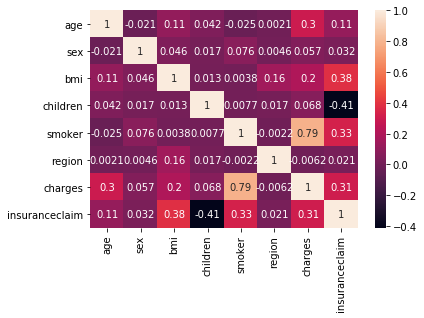

In [9]:
sns.heatmap(df.corr(),annot=True)

### Univariate Analysis

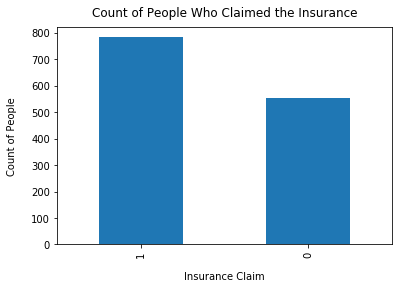

In [10]:
df['insuranceclaim'].value_counts().plot(kind="bar")
plt.xlabel("Insurance Claim", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Claimed the Insurance", y=1.02);

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

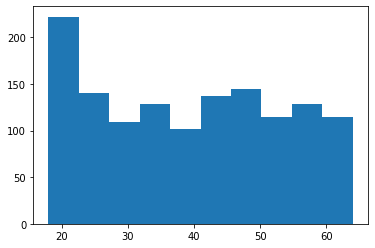

In [11]:
plt.hist(df['age'])

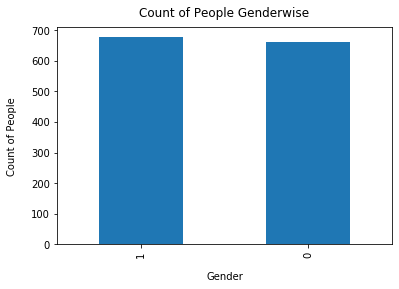

In [12]:
df['sex'].value_counts().plot(kind="bar")
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Genderwise", y=1.02);

In [13]:
df.groupby(df['sex']).size()

sex
0    662
1    676
dtype: int64

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

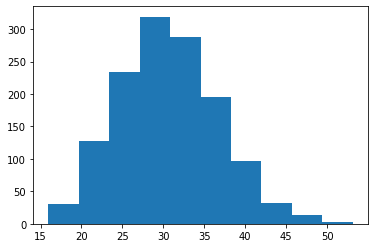

In [14]:
plt.hist(df['bmi'])

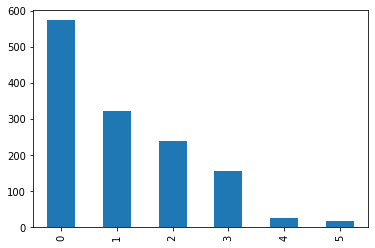

In [15]:
df['children'].value_counts().plot(kind="bar")

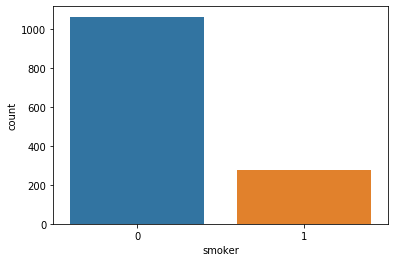

In [16]:
sns.countplot(df['smoker'])

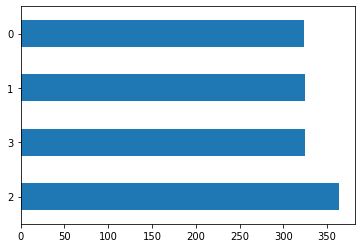

In [17]:
df['region'].value_counts().plot(kind="barh")

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

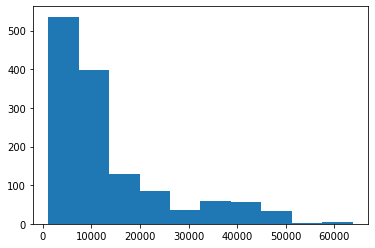

In [18]:
plt.hist(df['charges'])

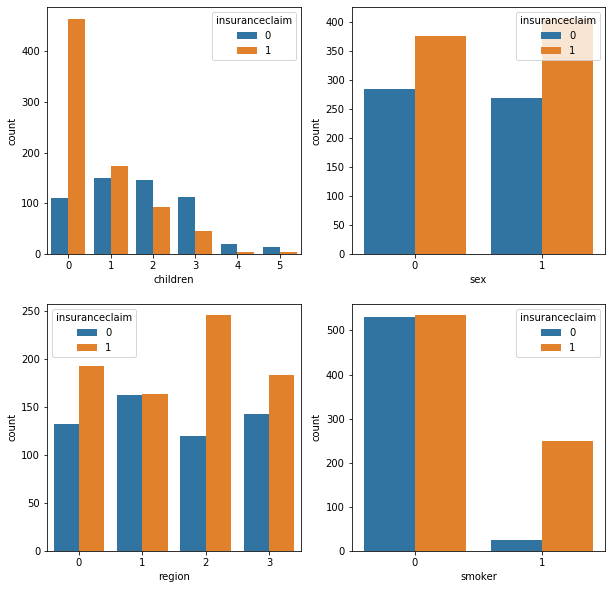

In [19]:
cols = ['children','sex','region','smoker']
fig, axes = plt.subplots(2, 2, figsize=(10,10))

for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        col = cols[i*2+j]
        sns.countplot(x=df[col],hue=df['insuranceclaim'],ax=ax)

### Bivariate Analysis

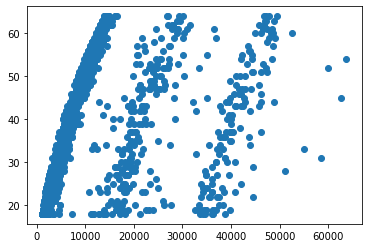

In [20]:
plt.scatter(df['charges'],df['age'])

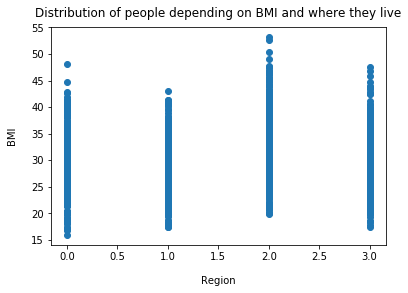

In [21]:
plt.scatter(df['region'],df['bmi'])
plt.xlabel("Region", labelpad=14)
plt.ylabel("BMI", labelpad=14)
plt.title("Distribution of people depending on BMI and where they live", y=1.02);

### Multivariate Analysis

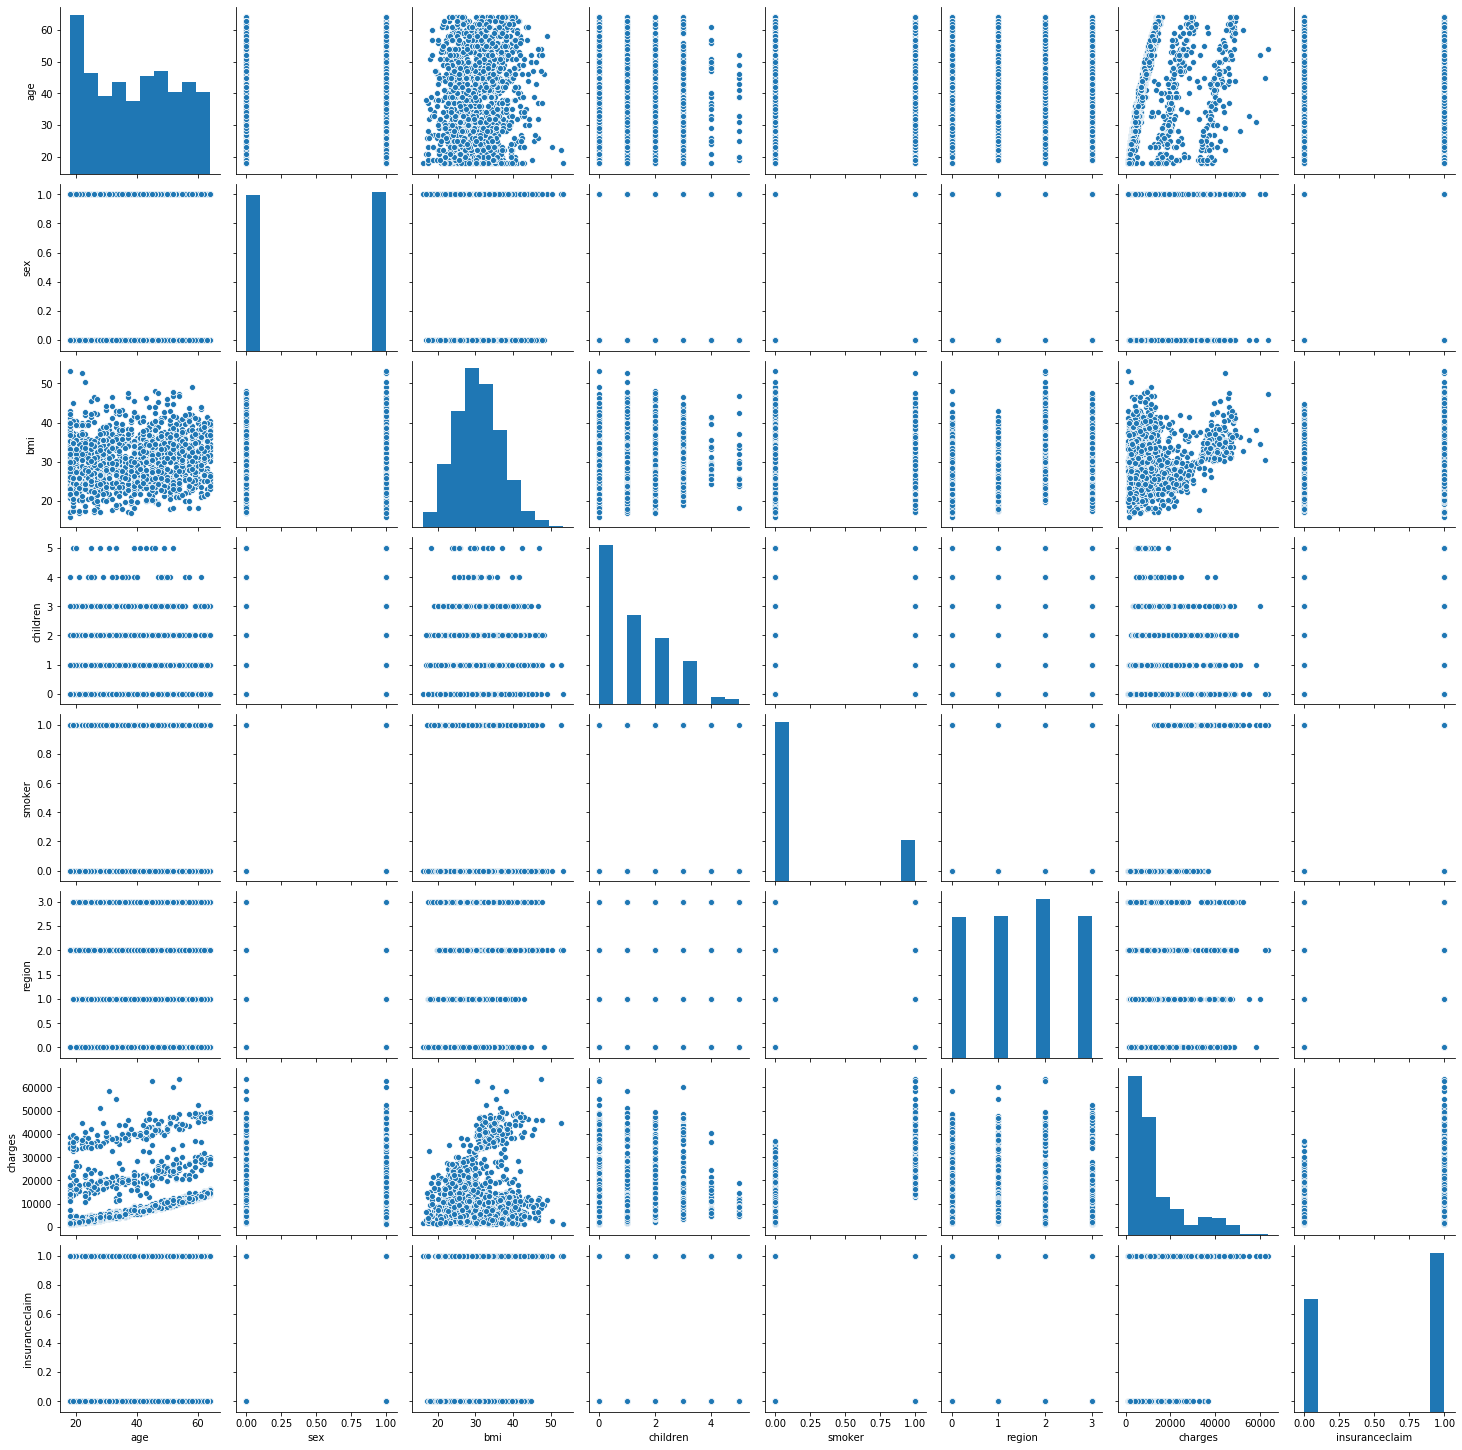

In [22]:
sns.pairplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x19926e96a08>,
 'caps': [<matplotlib.lines.Line2D at 0x19926d11188>,
 'boxes': [<matplotlib.lines.Line2D at 0x19926d9a648>],
 'medians': [<matplotlib.lines.Line2D at 0x199265fffc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1992658fc08>],
 'means': []}

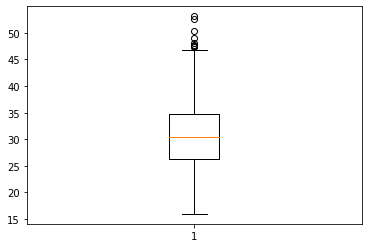

In [23]:
plt.boxplot(df['bmi'])

In [24]:
q_value = df['bmi'].quantile(0.95)
print(q_value)


41.105999999999995


### Modelling 

In [25]:
X = df.drop('insuranceclaim',axis=1)
y = df['insuranceclaim']


X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)


In [26]:

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.7947761194029851
[[ 71  36]
 [ 19 142]]


### Hyper parameter Tuning - Grid Search CV for Logistic Regression

In [27]:
parameters = {'C':[0.1,0.5,1,5]}
lr = LogisticRegression()
grid = GridSearchCV(lr,parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.835820895522388
[[ 85  22]
 [ 22 139]]


In [28]:
score = roc_auc_score( y_test, y_pred)
print(score)

0.8288732803157833


In [29]:
y_pred_proba = grid.predict_proba(X_test)[:,1]
print(y_pred_proba[0])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

0.1340270145296287
0.899402101352528


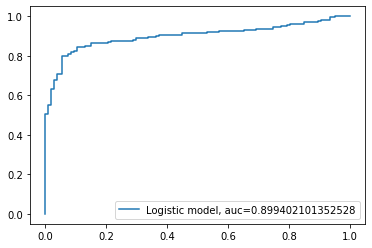

0.83
0.13
0.9


In [30]:
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
# Code ends here
print(round(score,2))
print(round(y_pred_proba[0],2))
print(round(roc_auc,2))

### Decision Tree Classifier

In [31]:
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
y_pred=dct.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.9776119402985075
[[103   4]
 [  2 159]]


In [32]:
score = roc_auc_score( y_test, y_pred)
print(score)

0.9750972310907297


### Random Forest Classifier

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.9104477611940298
[[ 96  11]
 [ 13 148]]


In [34]:
score = roc_auc_score( y_test, y_pred)
print(score)

0.9082254600336681


### AdaBoost Classifier

In [35]:
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred=adb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.8544776119402985
[[ 88  19]
 [ 20 141]]


In [36]:
score = roc_auc_score( y_test, y_pred)
print(score)

0.849103152028792


### KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.6305970149253731
[[ 64  43]
 [ 56 105]]


In [38]:
score = roc_auc_score( y_test, y_pred)
print(score)

0.6251523770824869


### Naive Bayesian

In [39]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.7723880597014925
[[ 95  12]
 [ 49 112]]


In [40]:
score = roc_auc_score( y_test, y_pred)
print(score)

0.7917513206013815


### Which is the best model?

In [42]:
from sklearn.model_selection import cross_val_score
rfccrossval = cross_val_score(rfc,X,y,cv=3)

In [44]:
rfccrossval.mean()

0.9499252615844543